# Working with AGOL items with the ArcGIS Python API
Now that we've covered how to connect to AGOL and find specific datasets, we'll now examine how we access these data as various programming objects and what we can do with those object. 

We'll start where the last notebooks left of: working with the [Census Tract data](db3f9c8728dd44e4ad455e0c27a85eea) (item ID = `db3f9c8728dd44e4ad455e0c27a85eea`. 

#### Resources:
* https://developers.arcgis.com/python/guide/working-with-feature-layers-and-features/

### Step 1. Connecting to AGOL and fetching the data item

In [1]:
#Import the GIS object and connect (this time anonymously)
from arcgis import GIS
gis = GIS()

In [2]:
#Fetch the census tract data from its item ID
tractsItem = gis.content.get('db3f9c8728dd44e4ad455e0c27a85eea')

In [3]:
#Display the item
tractsItem

<Item title:"USA Census Tract Areas" type:Feature Layer Collection owner:esri_dm>

In [4]:
#Reveal the data type
type(tractsItem)

arcgis.gis.Item

In [5]:
#Reveal the the type of Item
tractsItem.type

'Feature Service'

---
►  ***Knowledge check*** What is the item type for the item with the ID `427c34604a76466ba001fbc80817082a`

In [12]:
#Show the type of item 427c34604a76466ba001fbc80817082a
gis.content.get('427c34604a76466ba001fbc80817082a').type

'Web Map'

### Step 2. Exploring the item returned
The result we obtained is a generic AGOL "Item" ([Reference](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#item)). The item we retrieved happens to represent a **Feature Service** item (as seen above), and as such it has defined properties and methods that we can access programatically. 

To see what these are, we can retrieve the API reference on the Feature Layer object:<br>
https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#featurelayer

What's important to understand here is the nestedness of objects served on AGOL. And this can be seen by accessing our object's REST endpoint:

In [9]:
#Show the URL of the feature server's REST endpoint
print(tractsItem.url)

https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_Census_Tract_Areas_analysis_trim/FeatureServer


Click on the above link to access its REST endpoint. 

There you see indeed that it is a Feature Server. You also can see what **Feature Layers** are contained in this feature service:

>**Layers:**
>* [tracts_trim](https://services.arcgis.com/P3ePLMYs2RVChkJx/ArcGIS/rest/services/USA_Census_Tract_Areas_analysis_trim/FeatureServer/0) (0)

This indicates that we have just one feature layer associated with the feature service. We can reveal this via the ArcGIS Python API via the Feature Layers `layers` property:

In [13]:
#Extract the layer(s) included with this feature service
tractLayers = tractsItem.layers
tractLayers

[<FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_Census_Tract_Areas_analysis_trim/FeatureServer/0">]

This returns a list with just one layer in it -- just as we found in the browser based exploration. Now we extract that layer into its own coding object and reveal the data type of this object. 

In [19]:
#Pull the one layer item associated with the service to a new variable
tractsLayer = tractLayers[0]
type(tractsLayer)
tractsLayer.properties.fields

[{
   "name": "OBJECTID",
   "type": "esriFieldTypeOID",
   "alias": "OBJECTID",
   "sqlType": "sqlTypeOther",
   "nullable": false,
   "editable": false,
   "domain": null,
   "defaultValue": null
 },
 {
   "name": "FIPS",
   "type": "esriFieldTypeString",
   "alias": "FIPS",
   "sqlType": "sqlTypeOther",
   "length": 11,
   "nullable": true,
   "editable": true,
   "domain": null,
   "defaultValue": null
 },
 {
   "name": "COUNTY",
   "type": "esriFieldTypeString",
   "alias": "COUNTY",
   "sqlType": "sqlTypeOther",
   "length": 50,
   "nullable": true,
   "editable": true,
   "domain": null,
   "defaultValue": null
 },
 {
   "name": "STATE",
   "type": "esriFieldTypeString",
   "alias": "STATE",
   "sqlType": "sqlTypeOther",
   "length": 2,
   "nullable": true,
   "editable": true,
   "domain": null,
   "defaultValue": null
 },
 {
   "name": "POPULATION",
   "type": "esriFieldTypeInteger",
   "alias": "POP2020",
   "sqlType": "sqlTypeOther",
   "nullable": true,
   "editable": true,

We see this object is something called a **"FeatureLayer"**. We can explore the help on this object to see just what we can do with this kind of thing. Note also, however, the *FeatureLayer* object is a subset of the *Layer* object, and thus some of the operations of the Layer object will apply to the FeatureLayer object as well. So, we'd want to investigate the documentation on that object too. (In code speak, this is called *inheritance*: FeatureLayers inherit properies and methods from the Layer object...)

→ More info on the ArcGIS `layer` object: https://esri.github.io/arcgis-python-api/apidoc/html/arcgis.gis.toc.html#layer<br>
→ More info on the ArcGIS `FeatureLayer` object: https://esri.github.io/arcgis-python-api/apidoc/html/arcgis.features.toc.html#featurelayer

#### Mapping
The ArcGIS Python API has some nice mapping capability. Detailed information is at the link below, but a quick example goes a long way.
* https://developers.arcgis.com/python/guide/using-the-map-widget/

In [15]:
#Map the feature layer
m = gis.map('Durham, NC') #Create the map object, centered on Durham, NC
m.add_layer(tractsLayer)  #Adds the census tracts layer to the map
m                         #Displays the map

MapView(layout=Layout(height='400px', width='100%'))

In [23]:
#Map just Durham records and color by a field value
map2 = gis.map('Durham County, NC', 12) #Create the map object, centered on Durham, NC
map2.add_layer(tractsLayer,{"layer_defs":"COUNTY='Durham'", #Filter records for just Durham 
                            "renderer":"ClassedColorRenderer",         #Create a color renderer object
                            "field_name":"POPULATION",                 #Color based on the POPULATION field values
                            "opacity":0.7                              #Lighten the opacity
                         })  
map2

MapView(layout=Layout(height='400px', width='100%'))

---

### Step 5. Explore properties of the FeatureLayer object
The [`properties`](https://esri.github.io/arcgis-python-api/apidoc/html/arcgis.features.toc.html#arcgis.features.FeatureLayer.properties) function of the FeatureLayers object returns a dictionary of properties. 
* Print the entire `properties` object to expose all the properties...

In [24]:
#Reveal all properties of the feature layer
tractsLayer.properties

{
  "currentVersion": 11,
  "id": 0,
  "name": "tracts_trim",
  "type": "Feature Layer",
  "serviceItemId": "db3f9c8728dd44e4ad455e0c27a85eea",
  "cacheMaxAge": 3600,
  "displayField": "",
  "description": "",
  "copyrightText": "",
  "defaultVisibility": true,
  "editingInfo": {
    "lastEditDate": 1647033867857,
    "schemaLastEditDate": 1647033867857,
    "dataLastEditDate": 1647033867857
  },
  "multiScaleGeometryInfo": {
    "levels": [
      1,
      3,
      5,
      7
    ],
    "generalizationType": "Quantization"
  },
  "relationships": [],
  "isDataVersioned": false,
  "hasContingentValuesDefinition": false,
  "supportsAppend": true,
  "supportsCalculate": true,
  "supportsASyncCalculate": true,
  "supportsTruncate": true,
  "supportsAttachmentsByUploadId": true,
  "supportsAttachmentsResizing": true,
  "supportsRollbackOnFailureParameter": true,
  "supportsStatistics": true,
  "supportsExceedsLimitStatistics": true,
  "supportsAdvancedQueries": true,
  "supportsValidateSql"

* Print specific properties. What is the `service item ID` of our feature layer? Its `name`? Its `capabilities`? 

In [17]:
#Report the tractsLayer "itemID", "name", and "capabilities"
print("Service item ID:", tractsLayer.properties.serviceItemId)
print("Name:",tractsLayer.properties.name)
print("Capabilities",tractsLayer.properties.capabilities)

Service item ID: db3f9c8728dd44e4ad455e0c27a85eea
Name: tracts_trim
Capabilities Query,Extract


* The `fields` property returns another dictionary. Save that to a new variable then iterate through each field and print the field's name

In [25]:
#Iterate through all fields and report the field's name
for fld in tractsLayer.properties.fields:
    print (fld.name, end=',')

OBJECTID,FIPS,COUNTY,STATE,POPULATION,SQMI,Shape__Area,Shape__Length,

In [26]:
#Same as above, but using "list comprehension"
print([fld.name for fld in tractsLayer.properties.fields])

['OBJECTID', 'FIPS', 'COUNTY', 'STATE', 'POPULATION', 'SQMI', 'Shape__Area', 'Shape__Length']


### Step 6. Interact with our Feature Layer
Moving beyond just the properties, we can apply some of the methods associated with the feature layer. Most methods are for updating data, which we can't do, but we can list unique values and also subset records via a query. 

* List all the **unique values** in the STATE column in the feature layer

In [27]:
#List the unique values found in the STATE attribute. 
print(tractsLayer.get_unique_values('STATE'))

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


* **Query** the records in the Feature Layer

In [28]:
#Subset records that are in Durham Co (FIPS 37063)
fset_Durham = tractsLayer.query(where="FIPS LIKE '37063%'")
type(fset_Durham)

arcgis.features.feature.FeatureSet

The object returned is a **Feature Set**. ([Reference on feature set](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html#featureset))

In [29]:
#Display the number of results returned
len(fset_Durham)

68

* Create a quick map of the feature set.<br>
→ _Note feature sets use the map object's `draw()` function, whereas the feature layer above uses the `.add_layer()` function._ <br>
→ _Also note that sometimes you need to run the process twice to show the data..._

In [30]:
#Map the feature set with 'draw'
map3 = gis.map('Durham County, NC')
map3.basemap = 'osm' #(run map3.basemaps to create a list of basemap options)
map3.draw(fset_Durham,popup={'title':'COUNTY','content':'FIPS'})
map3

MapView(layout=Layout(height='400px', width='100%'))

* Report the geometry type of the FeatureSet

In [31]:
#What geometry type is the result
fset_Durham.geometry_type

'esriGeometryPolygon'

* Convert the featureset to a spatial dataframe with its `sdf` command

In [32]:
sdf_Durham = fset_Durham.sdf
sdf_Durham.head()

,OBJECTID,FIPS,COUNTY,STATE,POPULATION,SQMI,Shape__Area,Shape__Length,SHAPE
0,55495,37063000101,Durham County,NC,3330.0,1.30,5.167669e+06,10423.301594,"{""rings"": [[[-8781935.0392, 4305494.8451], [-8..."
1,55496,37063000102,Durham County,NC,4988.0,1.54,6.127327e+06,12098.778726,"{""rings"": [[[-8783363.714, 4306525.96989999], ..."
2,55497,37063000200,Durham County,NC,3242.0,1.17,4.626619e+06,10356.283454,"{""rings"": [[[-8781315.32329999, 4302557.2964],..."
3,55498,37063000301,Durham County,NC,2620.0,0.61,2.429881e+06,7821.606749,"{""rings"": [[[-8782926.45079999, 4303090.874000..."
4,55499,37063000302,Durham County,NC,3829.0,0.66,2.637309e+06,7076.598293,"{""rings"": [[[-8782669.3027, 4302959.9888], [-8..."


### Step 7. Save our data to a local file!
* The FeatureSet has another function called `save` which allows us to download our queried results.

In [34]:
#Save the selected features to a shapefile
fset_Durham.save(save_location='.',out_name='DurhamTracts')

'.\\DurhamTracts.shp'

---
### Success!

We just downloaded our own copy of the Durham County Tracts file. We can now grab any feature layer we've found on ArcGIS Online. Well, it's not always this easy as datasets to have some download limits:

In [35]:
tractsLayer.properties.maxRecordCount

2000

We can get around that restriction by "paging" our download, i.e. downloading in chunks of records, 2000 at a time...

For more info on this process, see ESRI's documentation on querying feature layers:<br>
https://developers.arcgis.com/python/guide/working-with-feature-layers-and-features/#Querying-feature-layers

### Step 8. Analyzing the data here, as a dataframe
Of course, why stop there. We have our data in our coding environment. Let's analyze it!

To facilitate analyses, we can convert our featureset to (1) a list of [Feature](https://developers.arcgis.com/python/api-reference/arcgis.features.toc.html) objects or (2) to a [spatial dataframe](https://developers.arcgis.com/python/guide/introduction-to-the-spatially-enabled-dataframe/). 

In [36]:
#Get all the tracts for North Carolina
nc_tracts = tractsLayer.query("STATE = 'NC'")
len(nc_tracts)

2660

In [37]:
#Convert feature set to a list of features
features = nc_tracts.features
len(features)

2660

In [38]:
#Grab the first feature
feature= features[0]
type(feature)

arcgis.features.feature.Feature

In [39]:
feature.get_value('FIPS')

'37001020100'

In [40]:
#Convert the feature set data as a dataframe (takes a moment...)
sdf = nc_tracts.sdf
sdf.head()

,OBJECTID,FIPS,COUNTY,STATE,POPULATION,SQMI,Shape__Area,Shape__Length,SHAPE
0,54922,37001020100,Alamance County,NC,4059.0,1.74,6.923603e+06,13160.677564,"{""rings"": [[[-8844009.14419999, 4314692.527200..."
1,54923,37001020200,Alamance County,NC,4492.0,1.34,5.316794e+06,10357.109213,"{""rings"": [[[-8841357.0678, 4314534.22240001],..."
2,54924,37001020400,Alamance County,NC,6764.0,4.57,1.816222e+07,22699.339684,"{""rings"": [[[-8841525.93969999, 4319271.282800..."
3,54925,37001020501,Alamance County,NC,3788.0,2.79,1.108090e+07,18117.438391,"{""rings"": [[[-8846114.8645, 4318755.652], [-88..."
4,54926,37001020502,Alamance County,NC,4272.0,2.11,8.403138e+06,14007.974342,"{""rings"": [[[-8843766.80169999, 4318245.1456],..."


* Note the output has a column called "SHAPE". These values are ArcGIS API `geometry` objects. 

#### Analyzing geometry of a single feature

In [41]:
#Extract the first row as a feature
theFeature = sdf.loc[0]
theFeature

OBJECTID                                                     54922
FIPS                                                   37001020100
COUNTY                                             Alamance County
STATE                                                           NC
POPULATION                                                  4059.0
SQMI                                                          1.74
Shape__Area                                         6923603.472656
Shape__Length                                         13160.677564
SHAPE            {'rings': [[[-8844009.14419999, 4314692.527200...
Name: 0, dtype: object

In [42]:
#Get the feature's "SHAPE" value
theGeom = theFeature['SHAPE']
type(theGeom)

arcgis.geometry._types.Polygon

In [43]:
#Get the feature's spatial reference (google the WKID to learn more)
theGeom.spatial_reference

{'wkid': 102100, 'latestWkid': 3857}

In [44]:
#Get the feature's area, in the spatial reference's units
theGeom.area

6923603.4495137455

https://esri.github.io/arcgis-python-api/apidoc/html/arcgis.geometry.html#arcgis.geometry.Geometry.get_area

In [45]:
#Get the area, in square miles, measured geodesically
theGeom.get_area(method='GEODESIC',units='MILES')

1.7419809040186967

#### Analyzing demographics by county

In [49]:
#Group the data by values in the COUNTY field
county_sum = sdf.groupby('COUNTY').sum()

In [47]:
#Show the first 5 records in the result
county_sum['POPULATION'].head()

COUNTY
Alamance County     166880.0
Alexander County     37983.0
Alleghany County     11910.0
Anson County         12999.0
Ashe County          10062.0
Name: POPULATION, dtype: float64

In [50]:
#Summarize the county data
county_sum['POPULATION'].describe()

count       100.000000
mean      73653.700000
std      115308.009183
min           0.000000
25%       14476.250000
50%       39159.000000
75%       86699.750000
max      712150.000000
Name: POPULATION, dtype: float64

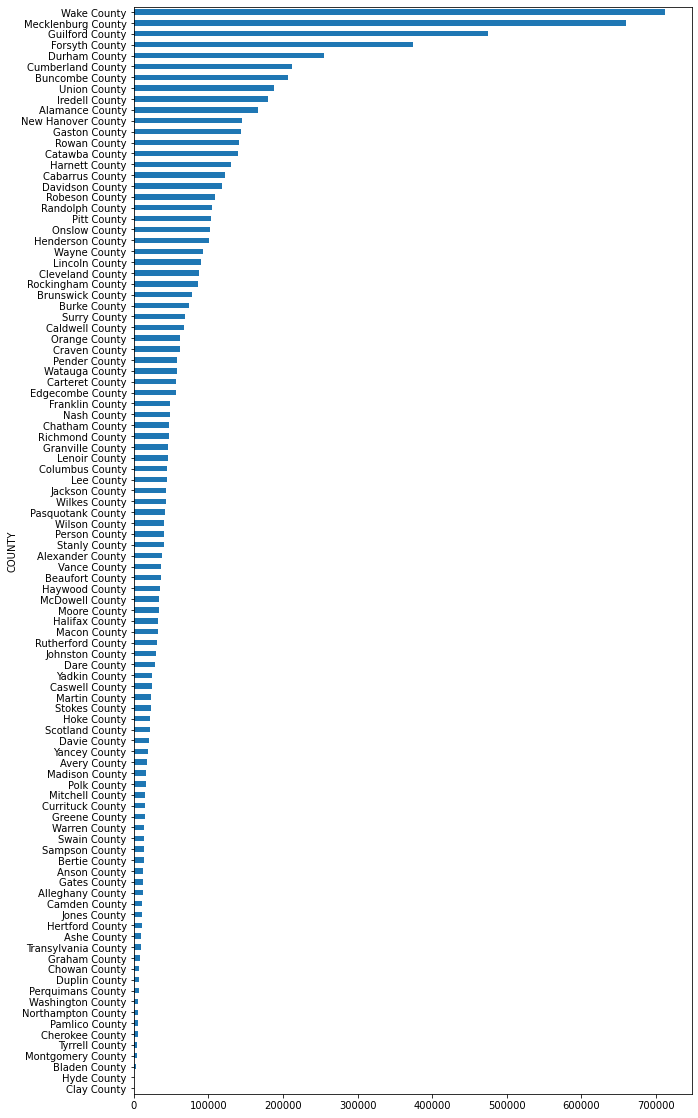

In [51]:
%matplotlib inline
county_sum['POPULATION'].sort_values().plot(kind='barh',figsize=(10,20));

## Summary
The learning curve steepens a bit on figuring out how to work with the data we can retrieve using the ArcGIS Python API. However, with patience, perserverence, and a structured understanding of both how the data are served and of the documentation, you can use the ArcGIS Python API to do a tremendous amount of useful coding. 

We've focused on data access, analysis, and visualization, but if you browse the notebook examples that ESRI provides, you'll see that the level of work you can use with this library is quite astounding. Furthermore, as GIS (and all computing really) moves from the desktop to the cloud, these types of analysis are likely to dominate the research landscape before too long. 